<a href="https://colab.research.google.com/github/gustavoramos82/Preven-o-churn/blob/main/Preven%C3%A7%C3%A3o_de_Churn_an%C3%A1lise_univariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análise de Churn

Neste notebook, será feito uma análise de churn para verificar o que levar a desistência dos clientes de um determinado banco, do qual o dataset foi obtido no kaggle (no qual pode ser obtido [aqui](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)).

Em um primerio momento, será feito uma análise exploratória, depois, será construido um modelo que classifique se um determinado cliente irá fazer churn ou não

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
churn = pd.read_csv('Customer-Churn-Records.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Dicionario dos dados

- **RowNumber**: Corresponde ao número da linha
- **CustomerId**: número de ID do cliente
- **Surname**: o apelido de um cliente
- **CreditScore**: Score de crédito do cliente
- **Geography**: Pais onde o cliente reside
- **Gender**: Genero do cliente
- **Age**: Idade do cliente
- **Tenure**: Refere-se ao número de anos que o cliente tem sido cliente do banco
- **Balance**: Balanço no cartão de crédito
- **NumOfProducts**: Número de produtos que o cliente comprou através do banco
- **HasCrCard**: Se tem ou não um cartão de crédito
- **IsActiveMember**: Se o cliente é ativo
- **EstimatedSalary**: Salário estimado do cliente
- **Exited**: Se o cliente deixou ou não o banco (*este será a nossa variável target*)
- **Complain**: Cliente tem alguma reclamação ou não
- **Satisfaction Score**: Pontuação fornecida pelo cliente para resolução de sua reclamação.
- **Card Type**: Tipo de cartão em posse do cliente.
- **Point Earned**: Pontos que o cliente adquiriu pelo uso do cartão de crédito



In [ ]:
# Excluindo as três primerias colunas já que elas não são necessárias
churn.drop(['RowNumber','CustomerId','Surname'],axis=1,
        inplace=True)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
churn.shape

(10000, 15)

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

Text(0, 0.5, 'Quantidade')

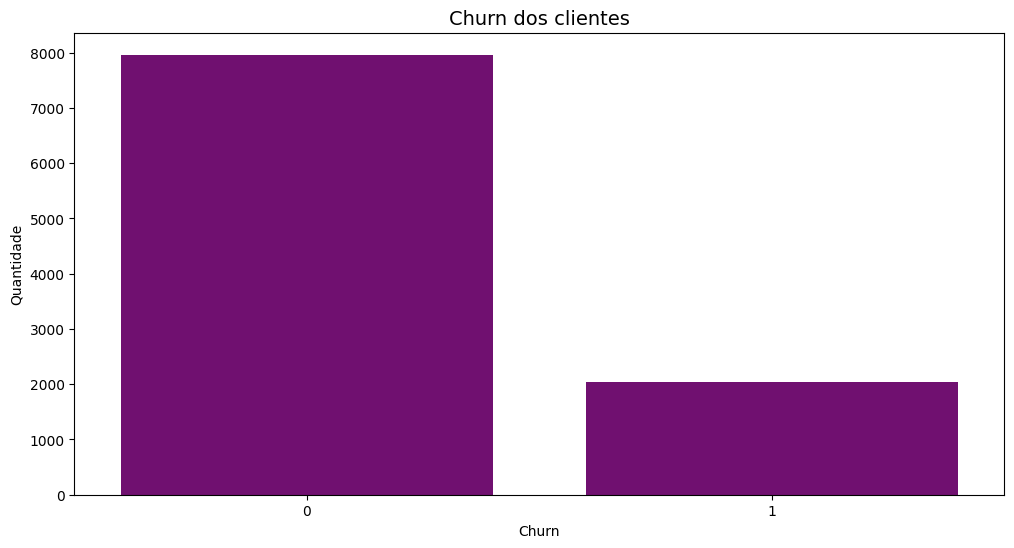

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Churn dos clientes',fontsize=14)
sns.countplot(x='Exited',data=churn,color='purple')
plt.xlabel('Churn')
plt.ylabel('Quantidade')

Podemos ver que os dados estão balanceado, dendo então tratar os dados e fazer a modelagem levando isso em consideração

Text(0, 0.5, 'Quantidade')

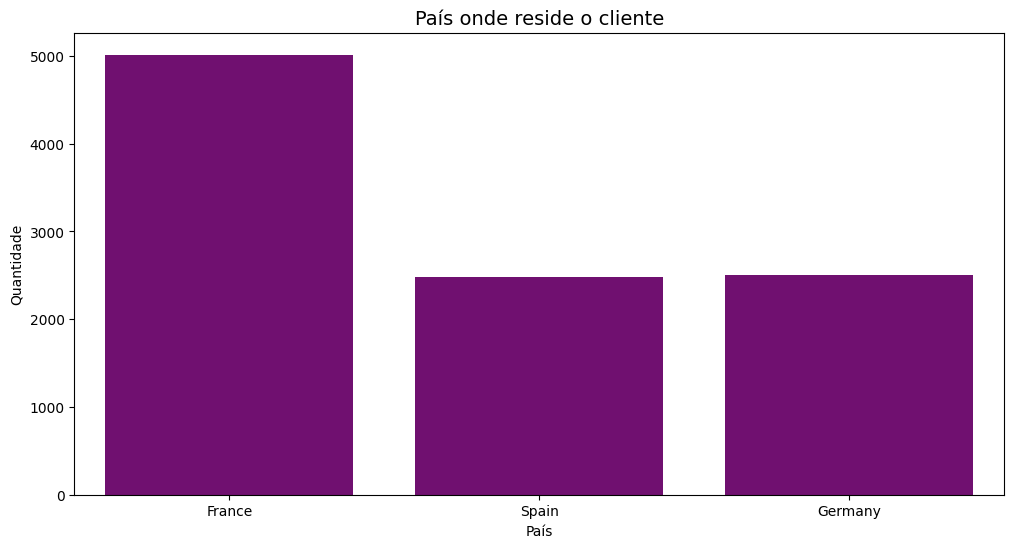

In [ ]:
plt.figure(figsize=(12,6))
plt.title('País onde reside o cliente',fontsize=14)
sns.countplot(x='Geography',data=churn,color='purple')
plt.xlabel('País')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

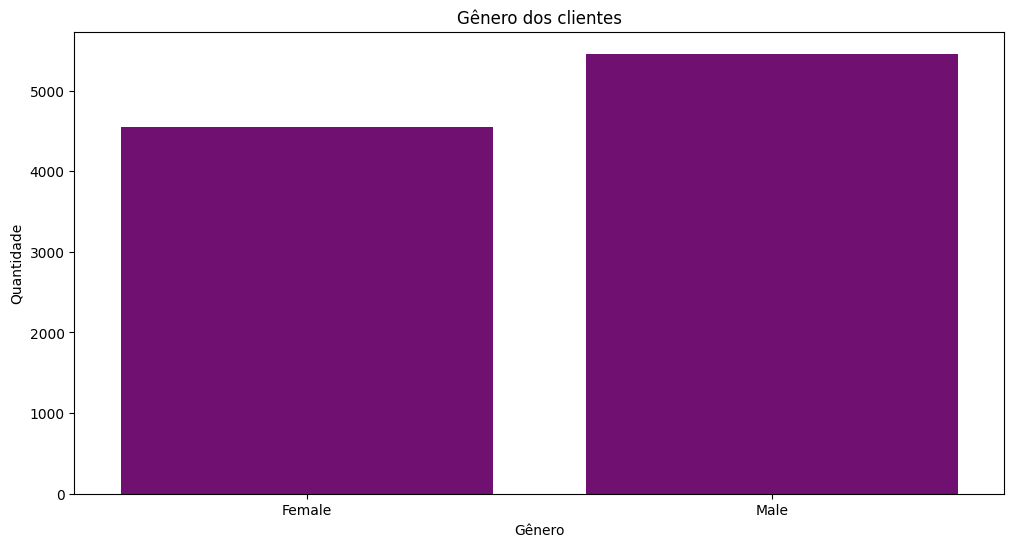

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gênero dos clientes')
sns.countplot(x='Gender',data=churn,color='purple')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

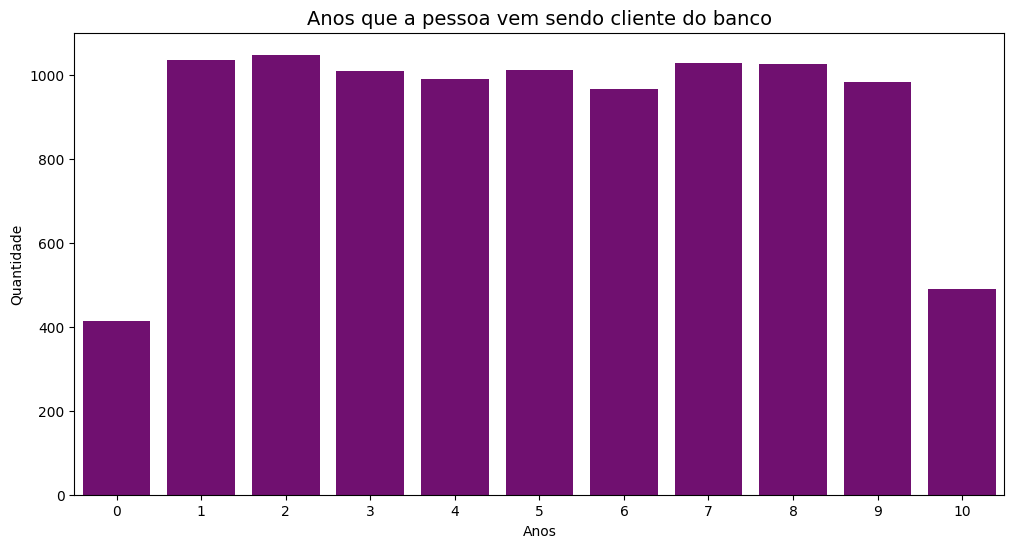

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Anos que a pessoa vem sendo cliente do banco',
          fontsize=14)
sns.countplot(x='Tenure',data=churn,color='purple')
plt.xlabel('Anos')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

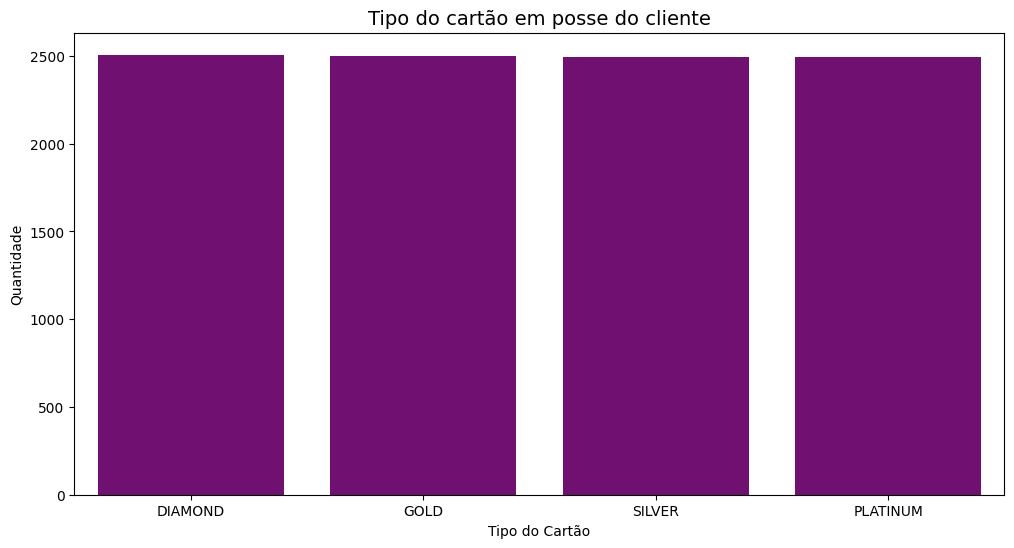

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Tipo do cartão em posse do cliente',fontsize=14)
sns.countplot(x='Card Type',data=churn,color='purple')
plt.xlabel('Tipo do Cartão')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

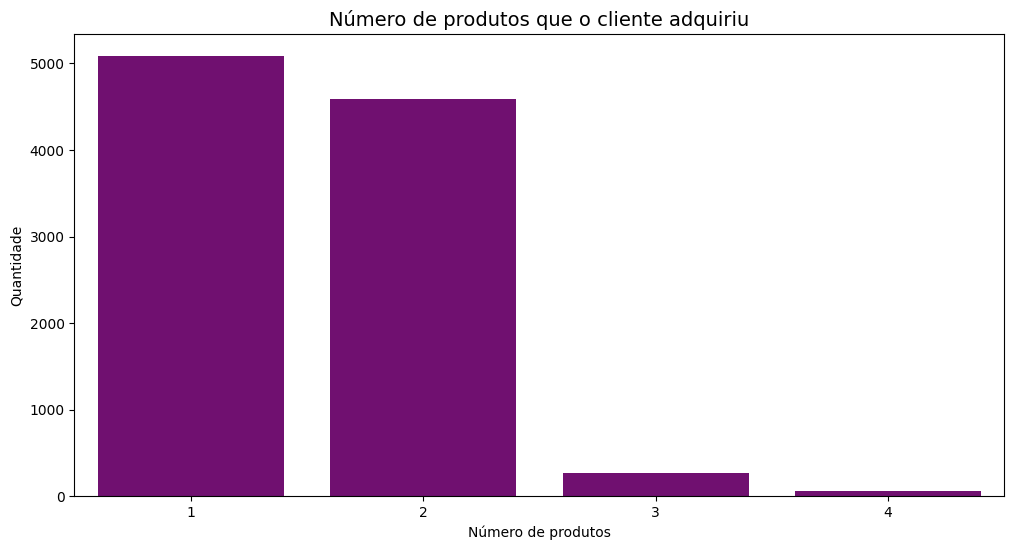

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Número de produtos que o cliente adquiriu',fontsize=14)
sns.countplot(x='NumOfProducts',data=churn,color='purple')
plt.xlabel('Número de produtos')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

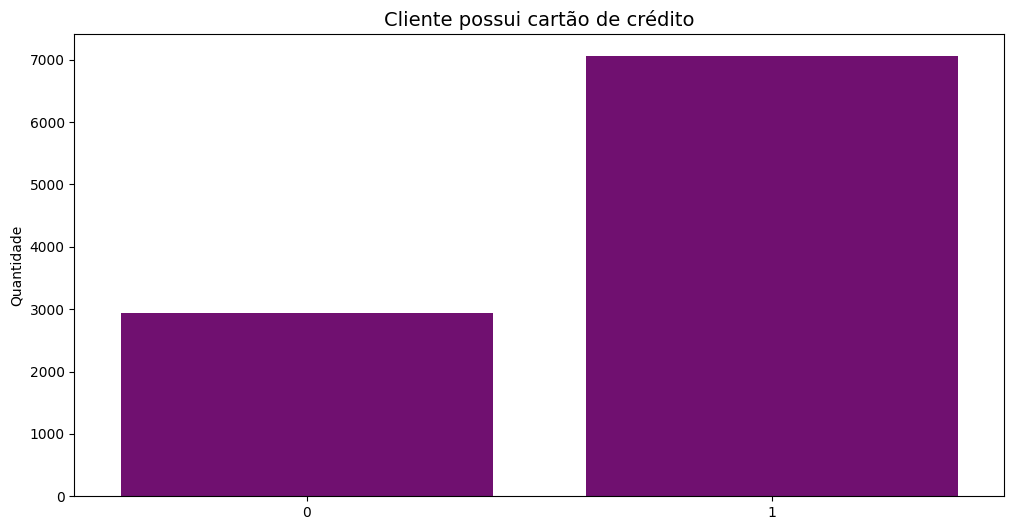

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cliente possui cartão de crédito',fontsize=14)
sns.countplot(x='HasCrCard',data=churn,color='purple')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

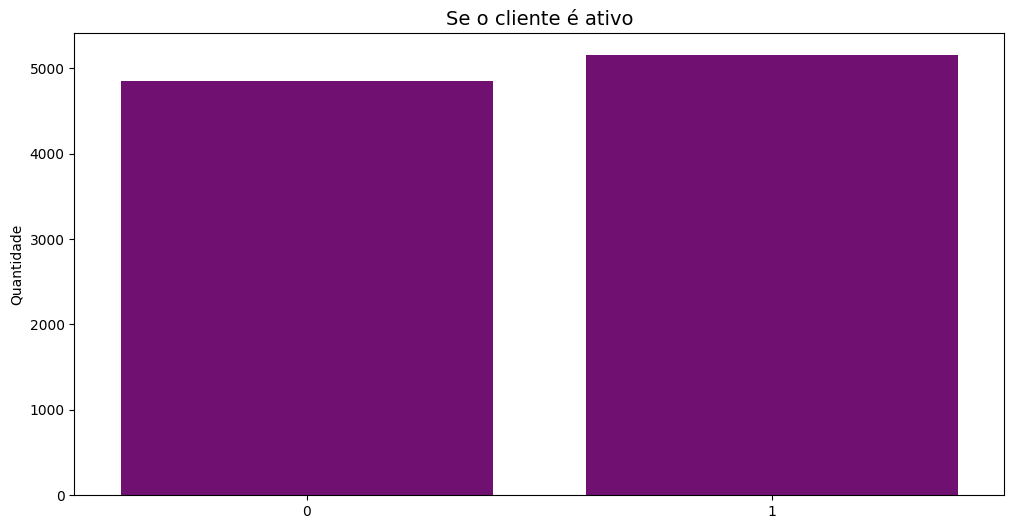

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Se o cliente é ativo',fontsize=14)
sns.countplot(x='IsActiveMember',data=churn,color='purple')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

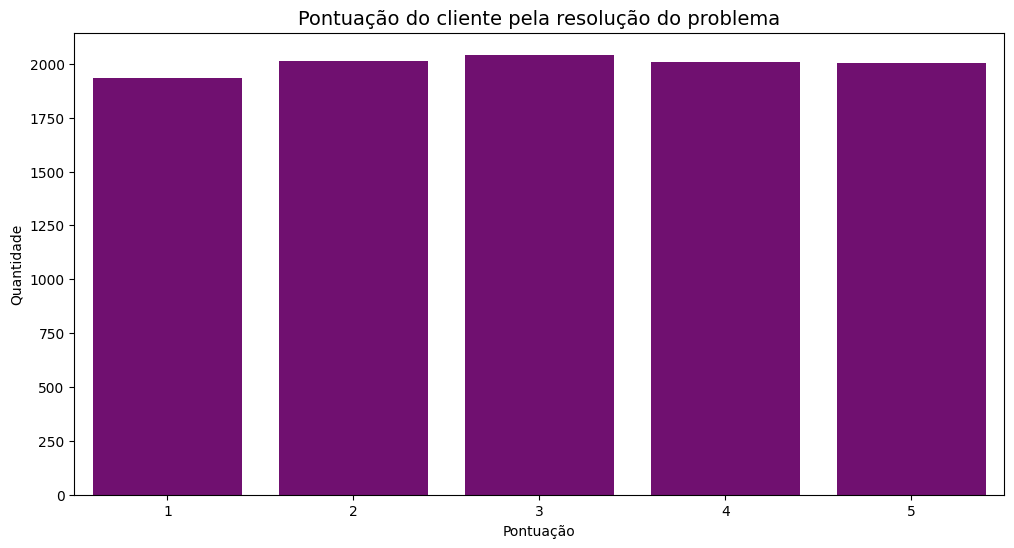

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Pontuação do cliente pela resolução do problema',
          fontsize=14)
sns.countplot(x='Satisfaction Score',data=churn,color='purple')
plt.xlabel('Pontuação')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

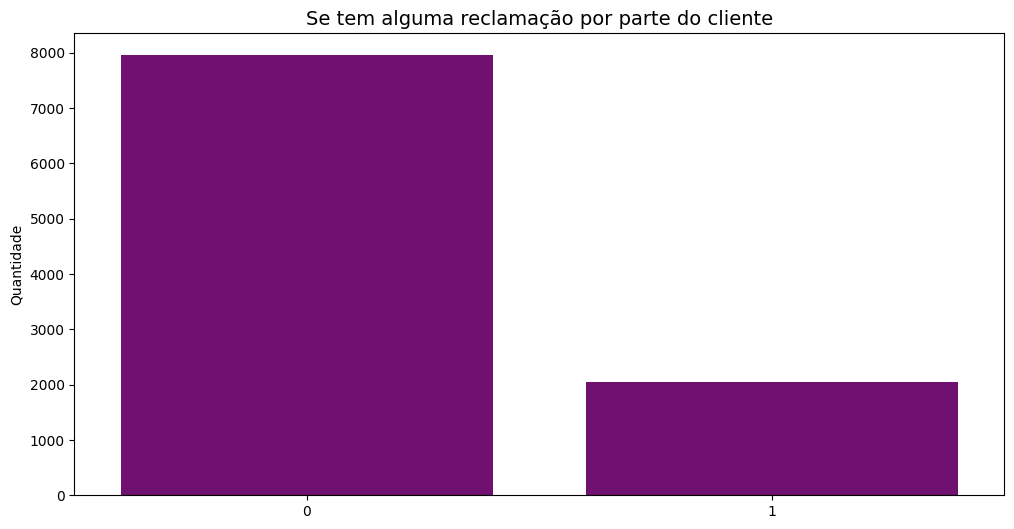

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Se tem alguma reclamação por parte do cliente',
          fontsize=14)
sns.countplot(x='Complain',data=churn,color='purple')
plt.xlabel('')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quatidade')

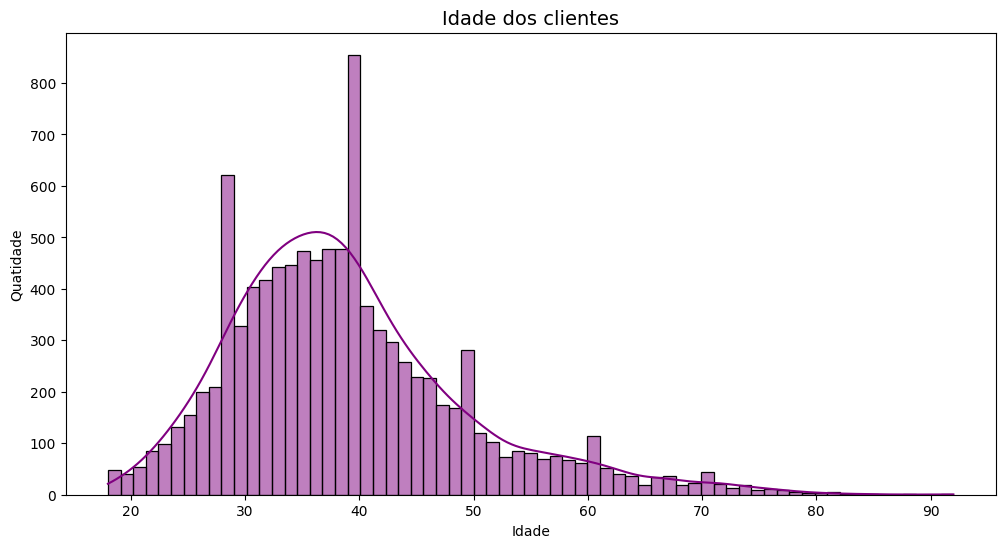

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Idade dos clientes',fontsize=14)
sns.histplot(x='Age',data=churn,color='purple',kde=True)
plt.xlabel('Idade')
plt.ylabel('Quatidade')

Text(0, 0.5, 'Quantidade')

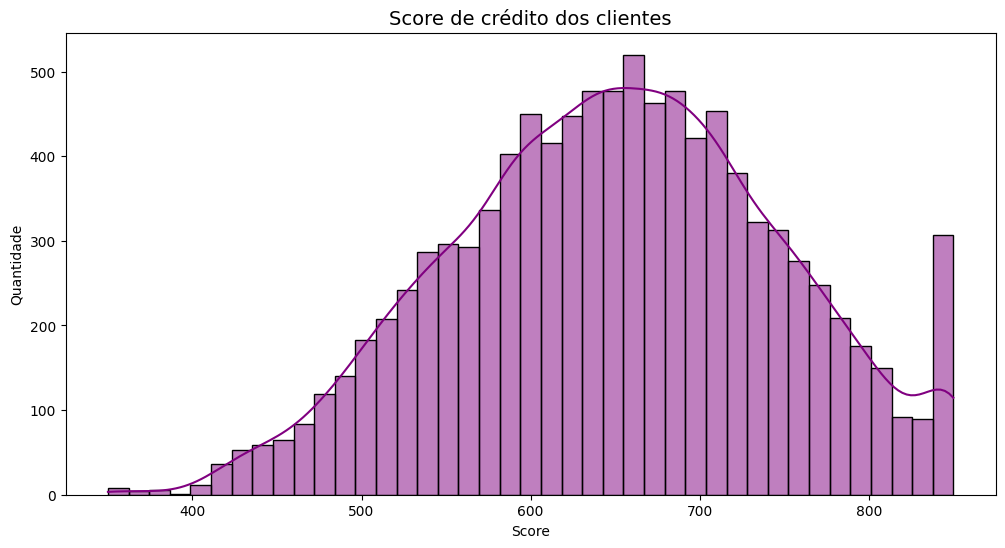

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Score de crédito dos clientes',fontsize=14)
sns.histplot(x='CreditScore',data=churn,color='purple',kde=True)
plt.xlabel('Score')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

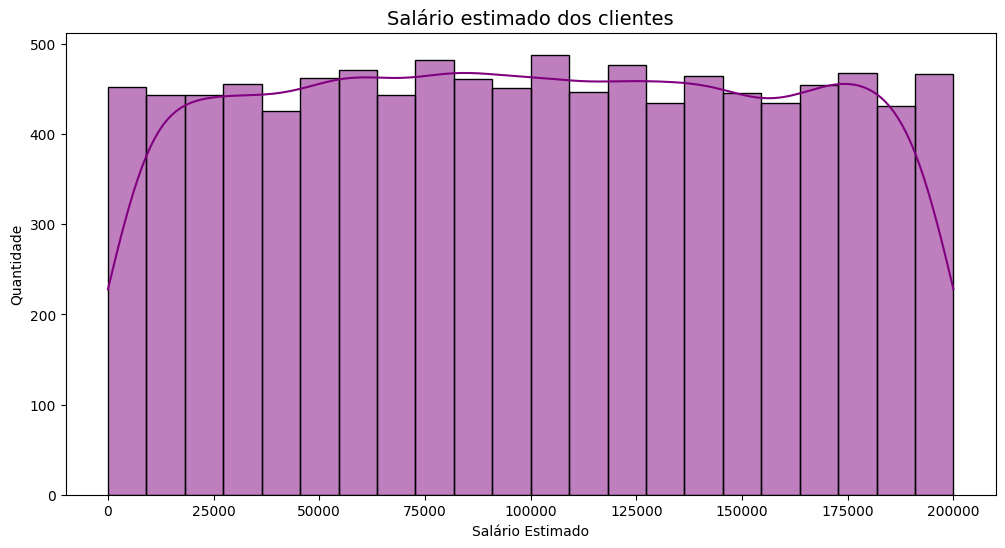

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Salário estimado dos clientes',fontsize=14)
sns.histplot(x='EstimatedSalary',data=churn,color='purple',kde=True)
plt.xlabel('Salário Estimado')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

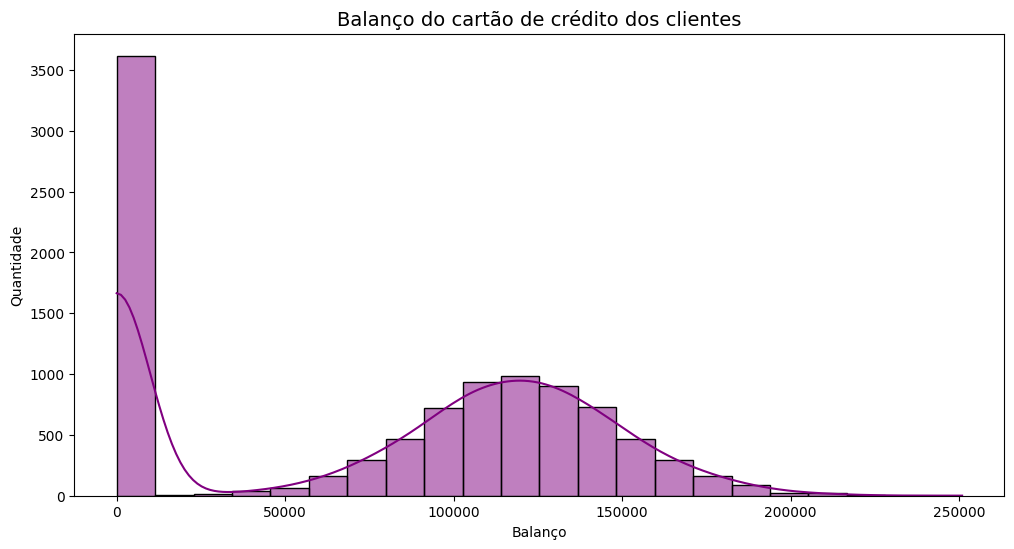

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Balanço do cartão de crédito dos clientes',
          fontsize=14)
sns.histplot(x='Balance',data=churn,color='purple',kde=True)
plt.xlabel('Balanço')
plt.ylabel('Quantidade')

Text(0, 0.5, 'Quantidade')

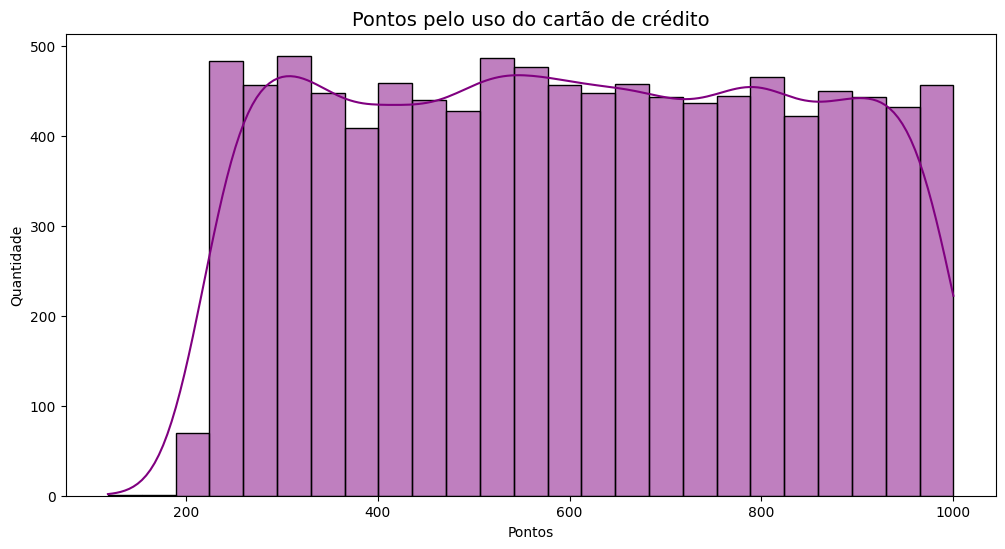

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Pontos pelo uso do cartão de crédito',fontsize=14)
sns.histplot(x='Point Earned',data=churn,color='purple',kde=True)
plt.xlabel('Pontos')
plt.ylabel('Quantidade')